In [1]:
!wget http://openi.nlm.nih.gov/imgs/collections/ChinaSet_AllFiles.zip

--2021-02-06 01:19:26--  http://openi.nlm.nih.gov/imgs/collections/ChinaSet_AllFiles.zip
Resolving openi.nlm.nih.gov (openi.nlm.nih.gov)... 130.14.52.157, 2607:f220:41e:7052::157
Connecting to openi.nlm.nih.gov (openi.nlm.nih.gov)|130.14.52.157|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://openi.nlm.nih.gov/imgs/collections/ChinaSet_AllFiles.zip [following]
--2021-02-06 01:19:26--  https://openi.nlm.nih.gov/imgs/collections/ChinaSet_AllFiles.zip
Connecting to openi.nlm.nih.gov (openi.nlm.nih.gov)|130.14.52.157|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3770205534 (3.5G) [application/zip]
Saving to: ‘ChinaSet_AllFiles.zip’

ChinaSet_AllFiles.z 100%[===================>]   3.51G  1.79MB/s    in 33m 45s 

2021-02-06 01:53:11 (1.78 MB/s) - ‘ChinaSet_AllFiles.zip’ saved [3770205534/3770205534]



In [ ]:
!unzip /content/ChinaSet_AllFiles.zip

In [5]:
import matplotlib.pyplot as plt

import matplotlib.image as mpimg

img=mpimg.imread('/content/nih/ChinaSet_AllFiles/CXR_png/CHNCXR_0001_0.png')

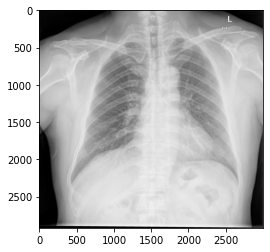

In [8]:
plt.imshow(img, cmap='binary')

In [94]:
import os
import pandas as pd

BASE_DIR = '/content/nih/ChinaSet_AllFiles/'
train_folder = BASE_DIR+'CXR_png'
train_annotation = BASE_DIR+'ClinicalReadings/'

files_in_train = sorted(os.listdir(train_folder))
files_in_annotated = sorted(os.listdir(train_annotation))

images=[i for i in files_in_train ]
images=images[0:-1]

labels =[label(train_annotation + '/' + i) for i in files_in_annotated]

df = pd.DataFrame()
df['images']=[str(x) for x in images]
 
print(len(labels))
df['labels']=[x for x in labels]
print(images[-1])

df.to_csv('files_path.csv', header=None)

662
CHNCXR_0662_1.png


In [95]:
print(labels)

['normal', 'normal', 'normal ', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal\n', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal ', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normale ', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal\n', 'normal\n', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal',

In [15]:
def label(text):
    mylines = []                             # Declare an empty list named mylines.
    with open (text, 'rt') as myfile: # Open lorem.txt for reading text data.
        for myline in myfile:                # For each line, stored as myline,
            mylines.append(myline)           # add its contents to mylines.
    label = mylines[1]
    if label is '\n':
      label = mylines[2]
    #print(label)
    return label

In [96]:
df.head(50)

,images,labels
0,CHNCXR_0001_0.png,normal
1,CHNCXR_0002_0.png,normal
2,CHNCXR_0003_0.png,normal
3,CHNCXR_0004_0.png,normal
4,CHNCXR_0005_0.png,normal
5,CHNCXR_0006_0.png,normal
6,CHNCXR_0007_0.png,normal
7,CHNCXR_0008_0.png,normal
8,CHNCXR_0009_0.png,normal
9,CHNCXR_0010_0.png,normal


In [97]:
df.describe()

,images,labels
count,662,662
unique,662,83
top,CHNCXR_0618_1.png,normal
freq,1,310


In [99]:
df.head(10)

,images,labels
0,CHNCXR_0001_0.png,normal
1,CHNCXR_0002_0.png,normal
2,CHNCXR_0003_0.png,normal
3,CHNCXR_0004_0.png,normal
4,CHNCXR_0005_0.png,normal
5,CHNCXR_0006_0.png,normal
6,CHNCXR_0007_0.png,normal
7,CHNCXR_0008_0.png,normal
8,CHNCXR_0009_0.png,normal
9,CHNCXR_0010_0.png,normal


In [103]:
df.to_csv('/content/experimentation/dataset_version04.csv',index=False, header=True)

In [104]:
import pandas as pd
import numpy as np

df = pd.read_csv("/content/experimentation/dataset_version04.csv" )

In [106]:
df.head(5)

,images,labels
0,CHNCXR_0001_0.png,normal
1,CHNCXR_0002_0.png,normal
2,CHNCXR_0003_0.png,normal
3,CHNCXR_0004_0.png,normal
4,CHNCXR_0005_0.png,normal


In [ ]:
#df.columns = ['number','images' , 'labels' ]

In [26]:
#df = df.drop('Unnamed: 0', axis =1)

In [ ]:
#df.to_csv("dataset_new", columns=['images' , 'labels']) #df.to_csv(file_name, encoding='utf-8', )

In [108]:
#df
df['labels'] = df['labels'].str.replace('/\n/g', '', regex=True)

In [110]:
df.head(1)

,images,labels
0,CHNCXR_0001_0.png,normal


In [111]:
df1 = df.copy(deep= True)

In [112]:
df1.loc[(df1['labels'] != 'normal'), 'labels'] = 'tuberculosis'

In [115]:
df1.tail(1)

,images,labels
661,CHNCXR_0662_1.png,tuberculosis


In [116]:
df1.describe()

,images,labels
count,662,662
unique,662,2
top,CHNCXR_0618_1.png,tuberculosis
freq,1,352


In [117]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 662 entries, 0 to 661
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   images  662 non-null    object
 1   labels  662 non-null    object
dtypes: object(2)
memory usage: 10.5+ KB


In [120]:
df1.to_csv('/content/experimentation/dataset_version05.csv',index=False, header=True)

In [121]:
import pandas as pd
import numpy as np

df = pd.read_csv("/content/experimentation/dataset_version05.csv")

In [122]:
df.tail(20)

,images,labels
642,CHNCXR_0643_1.png,tuberculosis
643,CHNCXR_0644_1.png,tuberculosis
644,CHNCXR_0645_1.png,tuberculosis
645,CHNCXR_0646_1.png,tuberculosis
646,CHNCXR_0647_1.png,tuberculosis
647,CHNCXR_0648_1.png,tuberculosis
648,CHNCXR_0649_1.png,tuberculosis
649,CHNCXR_0650_1.png,tuberculosis
650,CHNCXR_0651_1.png,tuberculosis
651,CHNCXR_0652_1.png,tuberculosis


In [123]:
df1= pd.get_dummies(df['labels'])

In [124]:
df2 = pd.concat([df, df1], axis=1)

In [50]:
df2 = df2.drop('Unnamed: 0', axis =1)



In [125]:
df2

,images,labels,normal,tuberculosis
0,CHNCXR_0001_0.png,normal,1,0
1,CHNCXR_0002_0.png,normal,1,0
2,CHNCXR_0003_0.png,tuberculosis,0,1
3,CHNCXR_0004_0.png,normal,1,0
4,CHNCXR_0005_0.png,normal,1,0
...,...,...,...,...
657,CHNCXR_0658_1.png,tuberculosis,0,1
658,CHNCXR_0659_1.png,tuberculosis,0,1
659,CHNCXR_0660_1.png,tuberculosis,0,1
660,CHNCXR_0661_1.png,tuberculosis,0,1


In [126]:
df2.to_csv("/content/experimentation/dataset_version06.csv" , header=True, index= False )

In [127]:
from sklearn.model_selection import train_test_split

*italicized text*

In [128]:
# split the data into train and test set
train, test = train_test_split(df2, test_size=0.8, random_state=42, shuffle=True)

In [129]:
train.to_csv('train.csv', index=False)
test.to_csv('test.csv', index=False)

In [72]:
df3 = pd.read_csv("nih/dataset_03.csv")



In [74]:
# split the data into train and test set
from sklearn.model_selection import train_test_split
train, test = train_test_split(df3, test_size=0.8, random_state=42, shuffle=True)

In [75]:
train.to_csv('train.csv' , index=False)
test.to_csv('test.csv', index=False)

In [130]:
train_df = pd.read_csv("nih/train.csv")
valid_df = pd.read_csv("nih/test.csv")
test_df = pd.read_csv("nih/test.csv")
labels = ['tuberculosis']
train_df.head()


,images,labels,normal,tuberculosis
0,CHNCXR_0652_1.png,tuberculosis,0,1
1,CHNCXR_0612_1.png,tuberculosis,0,1
2,CHNCXR_0603_1.png,tuberculosis,0,1
3,CHNCXR_0086_0.png,normal,1,0
4,CHNCXR_0243_0.png,tuberculosis,0,1


In [ ]:
!pip install scikit-plot

In [16]:
!python training.py

2021-02-06 02:36:20.109493: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
getting train generator...
Found 530 validated image filenames.
getting train and valid generators...
Found 530 validated image filenames.
Found 132 validated image filenames.
Found 132 validated image filenames.
[0.53018868]
[0.46981132]
freq_pos [0.53018868]
freq_pos [0.46981132]
length of pos_weights : 1
pos_contribution [0.24908864]
neg_contribution [0.24908864]
2021-02-06 02:36:30.344535: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-02-06 02:36:30.345587: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-02-06 02:36:30.387984: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUM

In [17]:
# Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import seaborn as sns
sns.set()

In [18]:
# Read csv file containing training datadata
train_df = pd.read_csv("nih/test.csv")
# Print first 5 rows
print(f'There are {train_df.shape[0]} rows and {train_df.shape[1]} columns in this data frame')
train_df.head()

There are 530 rows and 4 columns in this data frame


,images,labels,normal,tuberculosis
0,CHNCXR_0328_1.png,tuberculosis,0,1
1,CHNCXR_0579_1.png,tuberculosis,0,1
2,CHNCXR_0471_1.png,tuberculosis,0,1
3,CHNCXR_0363_1.png,tuberculosis,0,1
4,CHNCXR_0266_0.png,normal,1,0


In [19]:
columns = train_df.keys()
columns = list(columns)
print(columns)

['images', 'labels', 'normal', 'tuberculosis']


In [20]:
# Remove unnecesary elements
columns.remove('images')
columns.remove('labels')
# Get the total classes
print(f"There are {len(columns)} columns of labels for these conditions: {columns}")

There are 2 columns of labels for these conditions: ['normal', 'tuberculosis']


In [21]:
# Print out the number of positive labels for each class
for column in columns:
    print(f"The class {column} has {train_df[column].sum()} samples")

The class normal has 249 samples
The class tuberculosis has 281 samples


Display Random Images


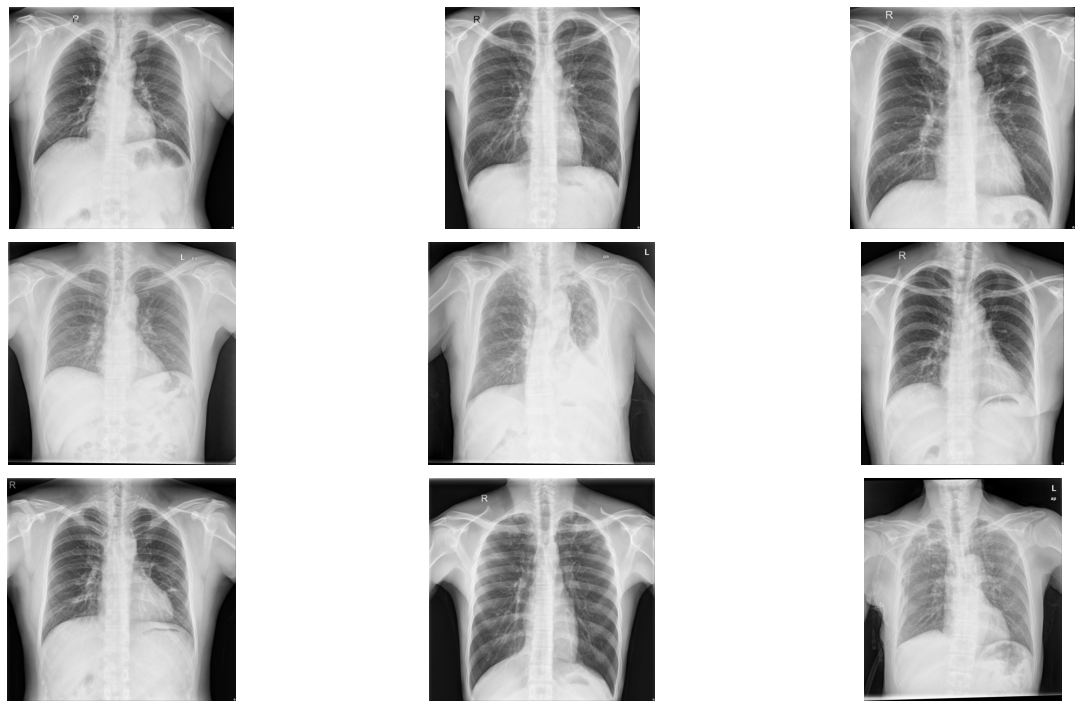

In [22]:
# Extract numpy values from Image column in data frame
images = train_df['images'].values

# Extract 9 random images from it
random_images = [np.random.choice(images) for i in range(9)]

# Location of the image dir
img_dir = '/content/nih/ChinaSet_AllFiles/CXR_png/'

print('Display Random Images')

# Adjust the size of your images
plt.figure(figsize=(20,10))

# Iterate and plot random images
for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(img_dir, random_images[i]))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    
# Adjust subplot parameters to give specified padding
plt.tight_layout()    

The dimensions of the image are 2788 pixels width and 2460 pixels height, one single color channel
The maximum pixel value is 1.0000 and the minimum is 0.0000
The mean value of the pixels is 0.5763 and the standard deviation is 0.2524


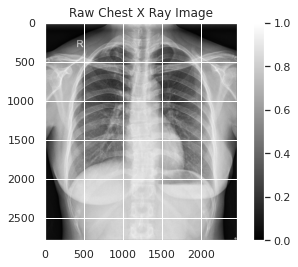

In [37]:
# Get the first image that was listed in the train_df dataframe
sample_img = train_df.images[3]
raw_image = plt.imread(os.path.join(img_dir, sample_img))
plt.imshow(raw_image, cmap='gray')
plt.colorbar()
plt.title('Raw Chest X Ray Image')
print(f"The dimensions of the image are {raw_image.shape[0]} pixels width and {raw_image.shape[1]} pixels height, one single color channel")
print(f"The maximum pixel value is {raw_image.max():.4f} and the minimum is {raw_image.min():.4f}")
print(f"The mean value of the pixels is {raw_image.mean():.4f} and the standard deviation is {raw_image.std():.4f}")

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, '# Pixels in Image')

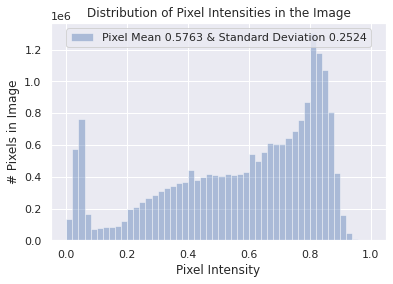

In [38]:
# Plot a histogram of the distribution of the pixels
sns.distplot(raw_image.ravel(), 
             label=f'Pixel Mean {np.mean(raw_image):.4f} & Standard Deviation {np.std(raw_image):.4f}', kde=False)
plt.legend(loc='upper center')
plt.title('Distribution of Pixel Intensities in the Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('# Pixels in Image')

In [39]:
# Import data generator from keras
from keras.preprocessing.image import ImageDataGenerator

In [40]:
# Normalize images
image_generator = ImageDataGenerator(
    samplewise_center=True, #Set each sample mean to 0.
    samplewise_std_normalization= True # Divide each input by its standard deviation
)

In [41]:
# Flow from directory with specified batch size and target image size
generator = image_generator.flow_from_dataframe(
        dataframe=train_df,
        directory="/content/nih/ChinaSet_AllFiles/CXR_png/",
        x_col="images", # features
        y_col= ['tuberculosis'], # labels
        class_mode="raw", # 'Mass' column should be in train/_df
        batch_size= 1, # images per batch
        shuffle=False, # shuffle the rows or not
        target_size=(320,320) # width and height of output image
)

Found 530 validated image filenames.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


The dimensions of the image are 320 pixels width and 320 pixels height
The maximum pixel value is 1.6802 and the minimum is -2.2883
The mean value of the pixels is -0.0000 and the standard deviation is 1.0000


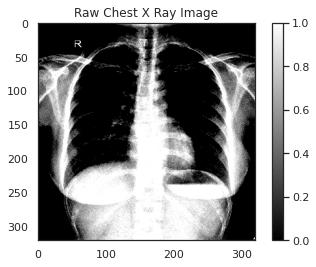

In [44]:
# Plot a processed image
sns.set_style("white")
generated_image, label = generator.__getitem__(3)
plt.imshow(generated_image[0], cmap='gray')
plt.colorbar()
plt.title('Raw Chest X Ray Image')
print(f"The dimensions of the image are {generated_image.shape[1]} pixels width and {generated_image.shape[2]} pixels height")
print(f"The maximum pixel value is {generated_image.max():.4f} and the minimum is {generated_image.min():.4f}")
print(f"The mean value of the pixels is {generated_image.mean():.4f} and the standard deviation is {generated_image.std():.4f}")

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, '# Pixel')

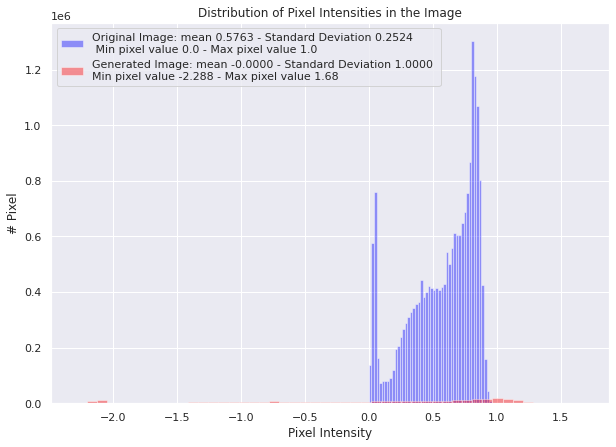

In [57]:
# Include a histogram of the distribution of the pixels
sns.set()
plt.figure(figsize=(10, 7))

# Plot histogram for original iamge
sns.distplot(raw_image.ravel(), 
             label=f'Original Image: mean {np.mean(raw_image):.4f} - Standard Deviation {np.std(raw_image):.4f} \n '
             f'Min pixel value {np.min(raw_image):.4} - Max pixel value {np.max(raw_image):.4}',
             color='blue', 
             kde=False)

# Plot histogram for generated image
sns.distplot(generated_image[0].ravel(), 
             label=f'Generated Image: mean {np.mean(generated_image[0]):.4f} - Standard Deviation {np.std(generated_image[0]):.4f} \n'
             f'Min pixel value {np.min(generated_image[0]):.4} - Max pixel value {np.max(generated_image[0]):.4}', 
             color='red', 
             kde=False)

# Place legends
plt.legend()
plt.title('Distribution of Pixel Intensities in the Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('# Pixel')
#plt.ylim(0, 2)